# Heart Disease Prediction

## 1. Importing Libraries

In [1214]:
#to handle Data
import numpy as np
import pandas as pd
#to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# To Preprocess Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer

# Import Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Model Selection Tasks
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.svm import SVC
import lightgbm as lgb

# For Classification Tasks

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    ConfusionMatrixDisplay
)
# Evaluation Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    ConfusionMatrixDisplay
)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the Dataset

In [1215]:
#loading csv dataset
df= pd.read_csv('synthetic_correlated_5000.csv')

In [1216]:
#dataset is uploaded successfully
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,35,Male,Switzerland,typical angina,125.154331,188.995310,False,st-t abnormality,193.684501,False,0.7,upsloping,0,reversable defect,0
1,2,40,Female,Switzerland,atypical angina,115.722071,200.444437,False,normal,178.825245,False,0.2,flat,0,normal,0
2,3,47,Male,Hungary,non-anginal,139.127713,189.497543,False,normal,191.194236,False,-0.5,upsloping,0,reversable defect,0
3,4,32,Male,Cleveland,asymptomatic,112.955465,211.322257,False,lv hypertrophy,176.468833,False,-0.2,flat,0,reversable defect,0
4,5,36,Male,Cleveland,typical angina,146.560101,215.710642,False,normal,196.417711,False,0.6,upsloping,0,reversable defect,0


## 3. Exploratory Data Analysis (EDA)

In [1217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        5000 non-null   int64  
 1   age       5000 non-null   int64  
 2   sex       5000 non-null   object 
 3   dataset   5000 non-null   object 
 4   cp        5000 non-null   object 
 5   trestbps  5000 non-null   float64
 6   chol      5000 non-null   float64
 7   fbs       5000 non-null   bool   
 8   restecg   5000 non-null   object 
 9   thalch    5000 non-null   float64
 10  exang     5000 non-null   bool   
 11  oldpeak   5000 non-null   float64
 12  slope     5000 non-null   object 
 13  ca        5000 non-null   int64  
 14  thal      5000 non-null   object 
 15  num       5000 non-null   int64  
dtypes: bool(2), float64(4), int64(4), object(6)
memory usage: 556.8+ KB


In [1218]:
df.shape

(5000, 16)

In [1219]:
# Get the min and max values of the id column
df['id'].min() , df['id'].max()

(1, 5000)

In [1220]:
df['age'] = df['age'].round().astype(int)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,35,Male,Switzerland,typical angina,125.154331,188.995310,False,st-t abnormality,193.684501,False,0.7,upsloping,0,reversable defect,0
1,2,40,Female,Switzerland,atypical angina,115.722071,200.444437,False,normal,178.825245,False,0.2,flat,0,normal,0
2,3,47,Male,Hungary,non-anginal,139.127713,189.497543,False,normal,191.194236,False,-0.5,upsloping,0,reversable defect,0
3,4,32,Male,Cleveland,asymptomatic,112.955465,211.322257,False,lv hypertrophy,176.468833,False,-0.2,flat,0,reversable defect,0
4,5,36,Male,Cleveland,typical angina,146.560101,215.710642,False,normal,196.417711,False,0.6,upsloping,0,reversable defect,0


In [1221]:
# Get the min and max values of the age column
df['age'].min() , df['age'].max()

(29, 71)

<Axes: xlabel='age', ylabel='Count'>

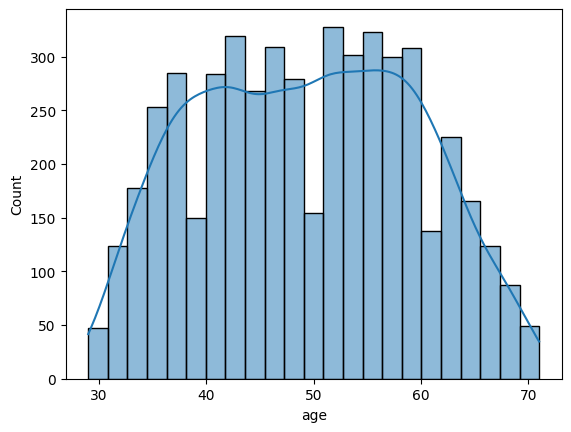

In [1222]:
# Draw a histogram of the age column to see the distribution
sns.histplot(df, x='age', kde=True)

Mean: 49.3358
Median: 50.0
Mode: 59


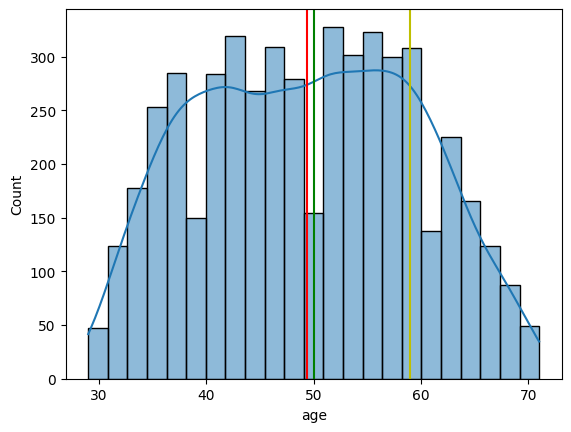

In [1223]:
# Plot the mean , median and mode of the age column using seaborn
sns.histplot(df, x='age', kde=True)
plt.axvline(df['age'].mean(), color='r')
plt.axvline(df['age'].median(), color='g')
plt.axvline(df['age'].mode()[0], color='y')

# Print the mean, median and mode
print(f"Mean: {df['age'].mean()}")
print(f"Median: {df['age'].median()}")
print(f"Mode: {df['age'].mode()[0]}")

In [1224]:
# Plot the histogram of age column using plotly  coloring this by sex column
px.histogram(df, x='age', color='sex')

In [1225]:
# Calculate % of value counts of male and female in data
male_count = 2706
female_count = 2294
total_count = male_count + female_count

male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

print(f"Male Percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = (male_count - female_count) / female_count * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data")



Male Percentage in the data: 54.12%
Female Percentage in the data: 45.88%
Males are 17.96% more than females in the data


## 4. Data Preprocessing

Droping features

In [1226]:
df = df.drop(['id', 'dataset'], axis=1)


handling missing values

In [1227]:
# Handling missing values
imputer= SimpleImputer(strategy='mean')
imputer_mostfrequent=SimpleImputer(strategy='most_frequent')
#trestbps
trestbps_imputed=imputer.fit_transform(df[['trestbps']])
null_mask=df['trestbps'].isnull()
df.loc[null_mask,'trestbps']=np.clip(trestbps_imputed[null_mask],0,200)

#chol
chol_imputed=imputer.fit_transform(df[['chol']])
null_mask=df['chol'].isnull()
df.loc[null_mask,'chol']=np.clip(chol_imputed[null_mask],128,300)

#fbs
null_mask=df['fbs'].isnull()
random_choices=np.random.choice([True,False],size=null_mask.sum())
df.loc[null_mask,'fbs']=random_choices

#restcg
df[['restecg']]=imputer_mostfrequent.fit_transform(df[['restecg']])

#thalch
thalch_imputed=imputer.fit_transform(df[['thalch']])
null_mask=df['thalch'].isnull()
df.loc[null_mask,'thalch']=np.clip(thalch_imputed[null_mask],60,202)

#exang
null_mask=df['exang'].isnull()
random_choices=np.random.choice([True,False],size=null_mask.sum())
df.loc[null_mask,'exang']=random_choices

#oldpeak
oldpeak_imputed=imputer.fit_transform(df[['oldpeak']])
null_mask=df['oldpeak'].isnull()
df.loc[null_mask,'oldpeak']=np.clip(oldpeak_imputed[null_mask],-0.84,3.56)

#slope
df[['slope']]=imputer_mostfrequent.fit_transform(df[['slope']])

#ca
ca_imputed=imputer.fit_transform(df[['ca']])
null_mask=df['ca'].isnull()
df.loc[null_mask,'ca']=np.clip(ca_imputed[null_mask],0,3)

#thal
df[['thal']]=imputer_mostfrequent.fit_transform(df[['thal']])

In [1228]:
# check missing values in the all columns of the data
missing = (df.isnull().sum()[df.isnull().sum()>0]/len(df)*100).sort_values(ascending=False)
print(missing)


# create the bar plot using plotly
fig = px.bar(missing,title="Percentage of Missing values in the data")
fig.show()

Series([], dtype: float64)


removing duplicates

In [1229]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate records: {duplicate_count}")


Number of duplicate records: 0


In [1230]:
# # Remove duplicate rows
# df = df.drop_duplicates()
# print("New shape after removing duplicates:", df.shape)

Removing outliers

In [1231]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,35,Male,typical angina,125.154331,188.995310,False,st-t abnormality,193.684501,False,0.7,upsloping,0,reversable defect,0
1,40,Female,atypical angina,115.722071,200.444437,False,normal,178.825245,False,0.2,flat,0,normal,0
2,47,Male,non-anginal,139.127713,189.497543,False,normal,191.194236,False,-0.5,upsloping,0,reversable defect,0
3,32,Male,asymptomatic,112.955465,211.322257,False,lv hypertrophy,176.468833,False,-0.2,flat,0,reversable defect,0
4,36,Male,typical angina,146.560101,215.710642,False,normal,196.417711,False,0.6,upsloping,0,reversable defect,0


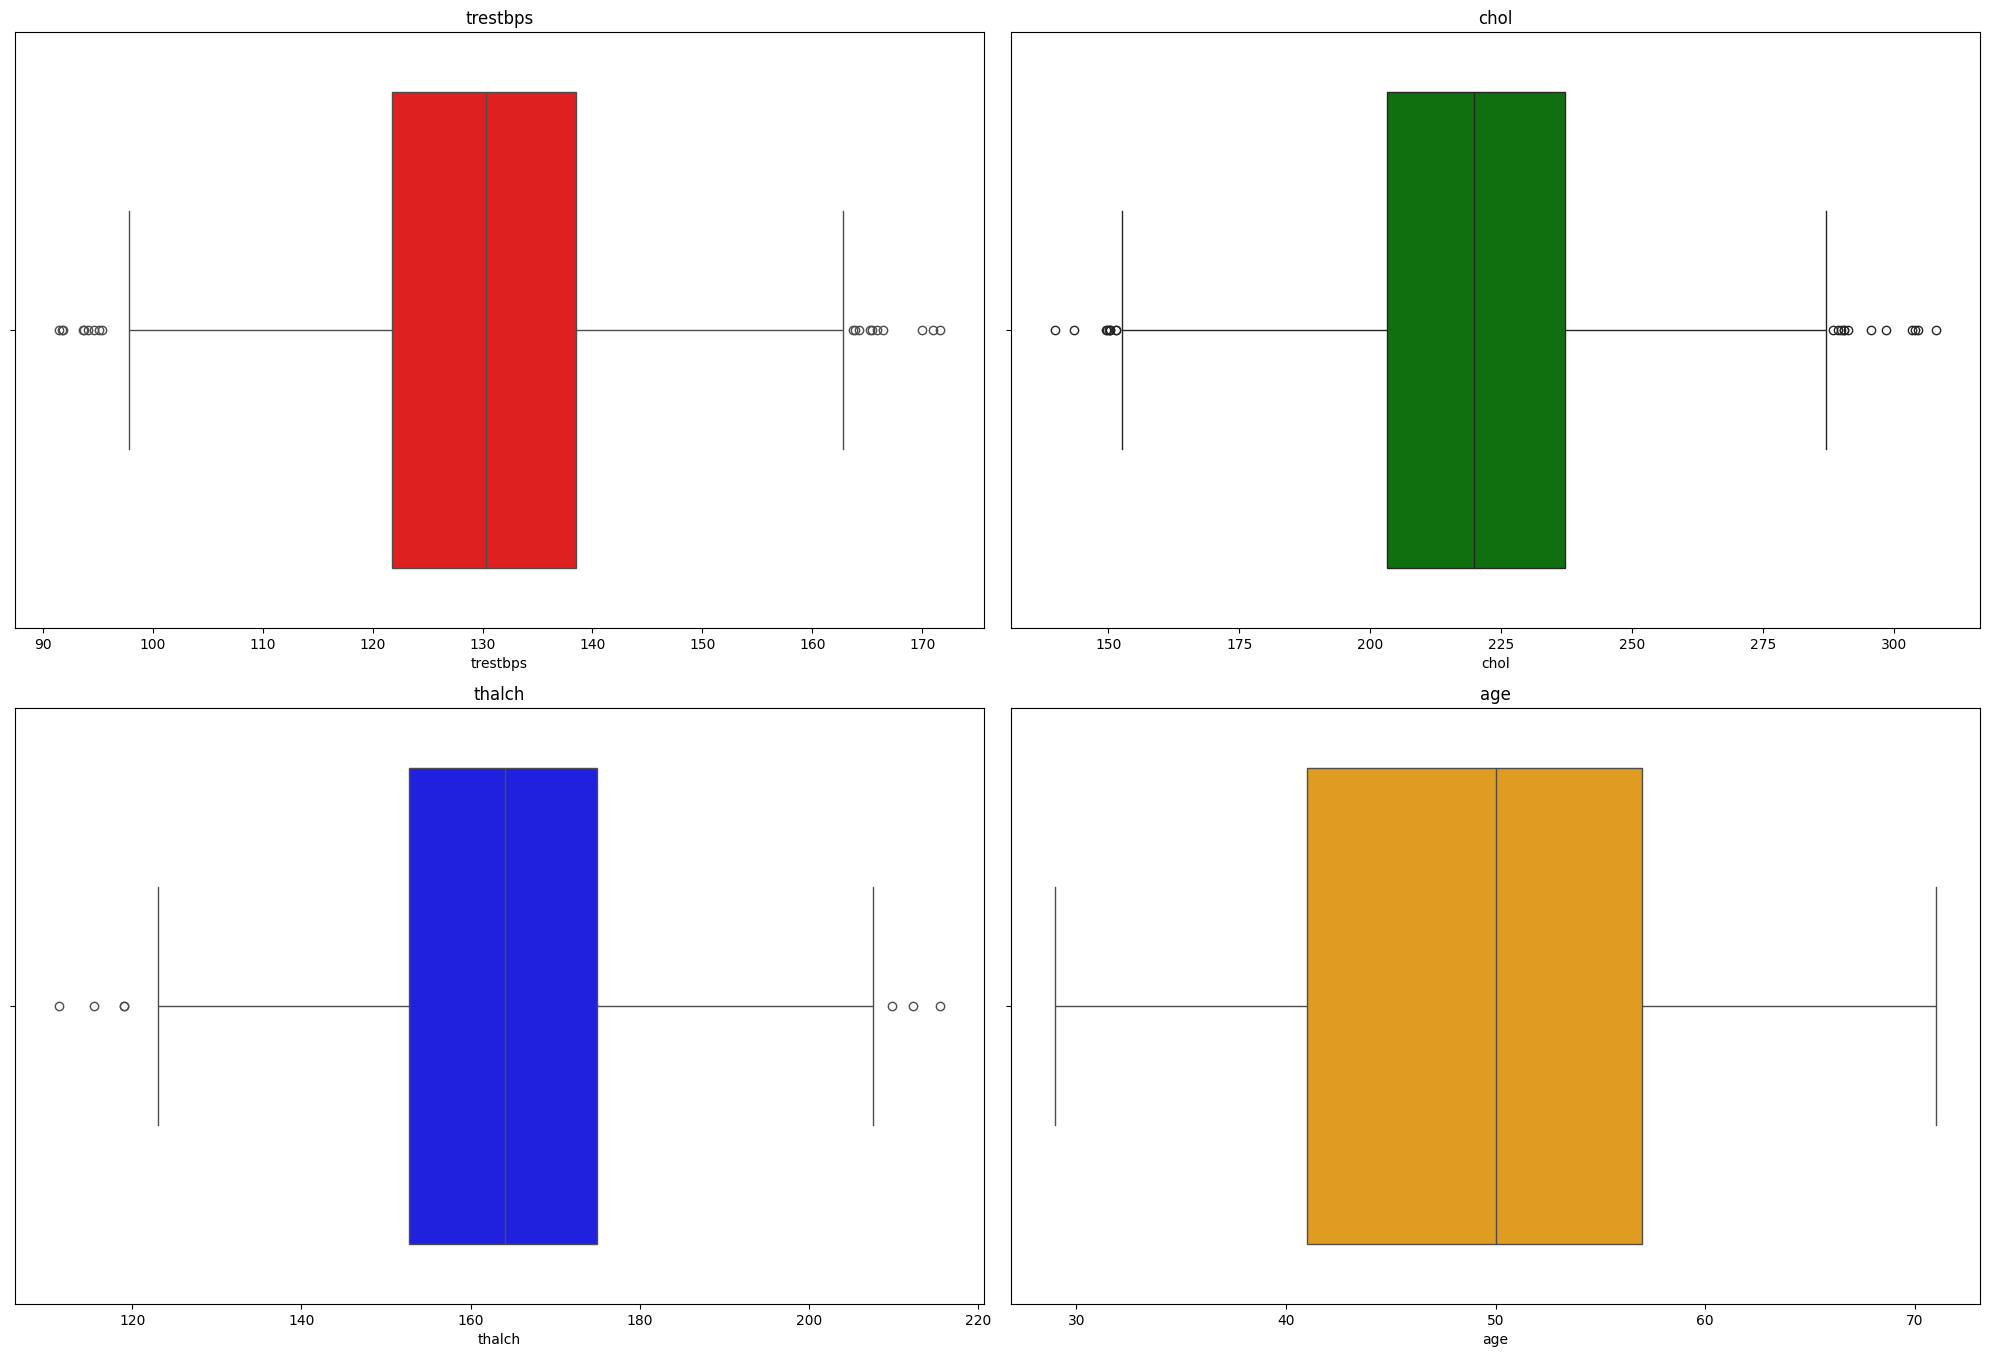

In [1232]:
# create boxplot for all numeric columns using for loop and subplots
plt.figure(figsize=(20,20))
numeric_cols=['trestbps','chol','thalch','age']
colors= ['red','green','blue','orange','purple']
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col],color=colors[i])
    plt.title(col)
    plt.tight_layout()
plt.show()

In [1233]:
# find the record where chol is zero
df[df['chol'] == 0]

# remove this record from the data
df = df[df['chol'] != 0]


[TRESTBPS] Q1: 121.74779278673522, Q3: 138.48352121549107, Lower: 96.64420014360144, Upper: 163.58711385862483
Rows removed from 'trestbps': 19


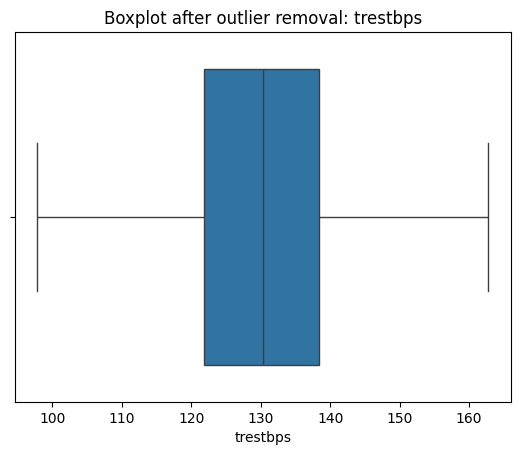


[CHOL] Q1: 203.2175857429508, Q3: 237.0991355819579, Lower: 152.39526098444014, Upper: 287.92146034046857
Rows removed from 'chol': 20


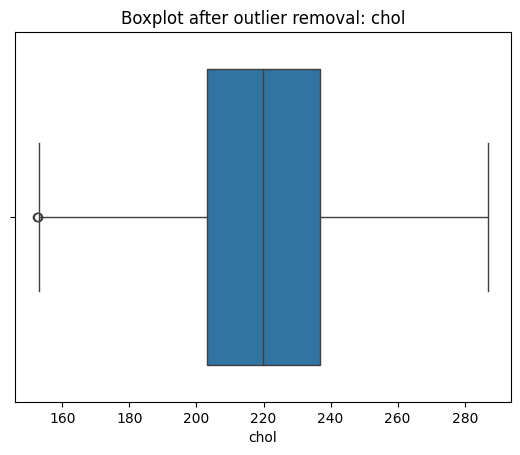


[THALCH] Q1: 152.7051773737392, Q3: 174.96564440838802, Lower: 119.31447682176595, Upper: 208.35634496036124
Rows removed from 'thalch': 7


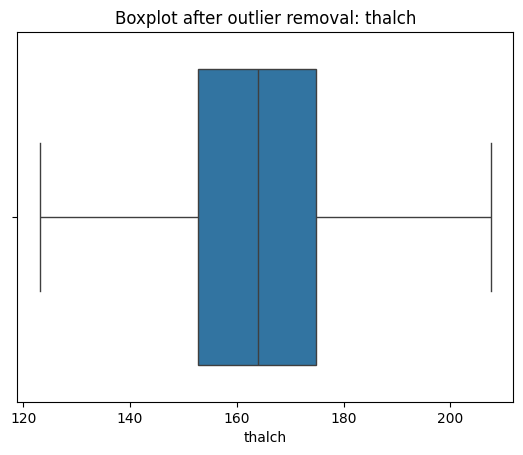


[AGE] Q1: 41.0, Q3: 57.0, Lower: 17.0, Upper: 81.0
Rows removed from 'age': 0


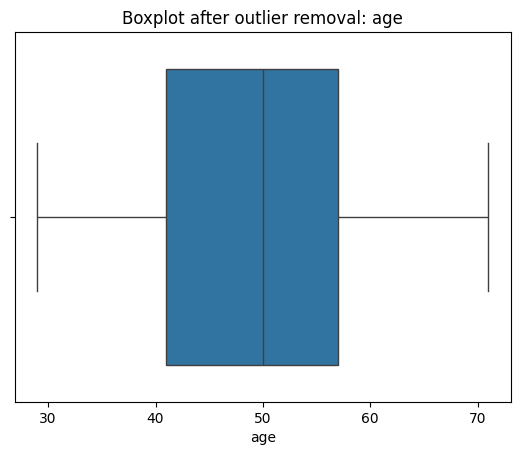


✅ Final Data Shape: (4954, 14)


In [1234]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"\n[{col.upper()}] Q1: {Q1}, Q3: {Q3}, Lower: {lower_bound}, Upper: {upper_bound}")
    original_shape = df.shape
    df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"Rows removed from '{col}': {original_shape[0] - df_cleaned.shape[0]}")
    return df_cleaned

# 🔁 Columns to clean
columns_to_clean = numeric_cols

# 🧹 Apply outlier removal
for col in columns_to_clean:
    df = remove_outliers_iqr(df, col)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot after outlier removal: {col}")
    plt.show()

print(f"\n✅ Final Data Shape: {df.shape}")


## 5. Feature Engineering

Label Encoding

In [1235]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [1236]:
encoders = {}

In [1237]:
# Encode each column using separate LabelEncoder and save encoder for inverse_transform
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Handle missing as 'nan'
    encoders[col] = le

# Now df is encoded
print(df.head())

   age  sex  cp    trestbps        chol  fbs  restecg      thalch  exang  \
0   35    1   3  125.154331  188.995310    0        2  193.684501      0   
1   40    0   1  115.722071  200.444437    0        1  178.825245      0   
2   47    1   2  139.127713  189.497543    0        1  191.194236      0   
3   32    1   0  112.955465  211.322257    0        0  176.468833      0   
4   36    1   3  146.560101  215.710642    0        1  196.417711      0   

   oldpeak  slope  ca  thal  num  
0      0.7      2   0     2    0  
1      0.2      1   0     1    0  
2     -0.5      2   0     2    0  
3     -0.2      1   0     2    0  
4      0.6      2   0     2    0  


In [1238]:
# Inverse transform example (recover original values)
# for col in cat_cols:
#     df[col] = encoders[col].inverse_transform(df[col])

# Now df has original values back
# print(df.head())

In [1239]:
df['num'].value_counts()

,count
num,
2,998
3,996
1,996
0,984
4,980


Resample

In [1240]:
from sklearn.utils import resample

df_balanced = pd.DataFrame()

for label in df['num'].unique():
    class_data = df[df['num'] == label]
    max_count = df['num'].value_counts().max()
    class_upsampled = resample(class_data, replace=True, n_samples=max_count, random_state=42)
    df_balanced = pd.concat([df_balanced, class_upsampled])

df = df_balanced.sample(frac=1, random_state=42)  # shuffle


correlation

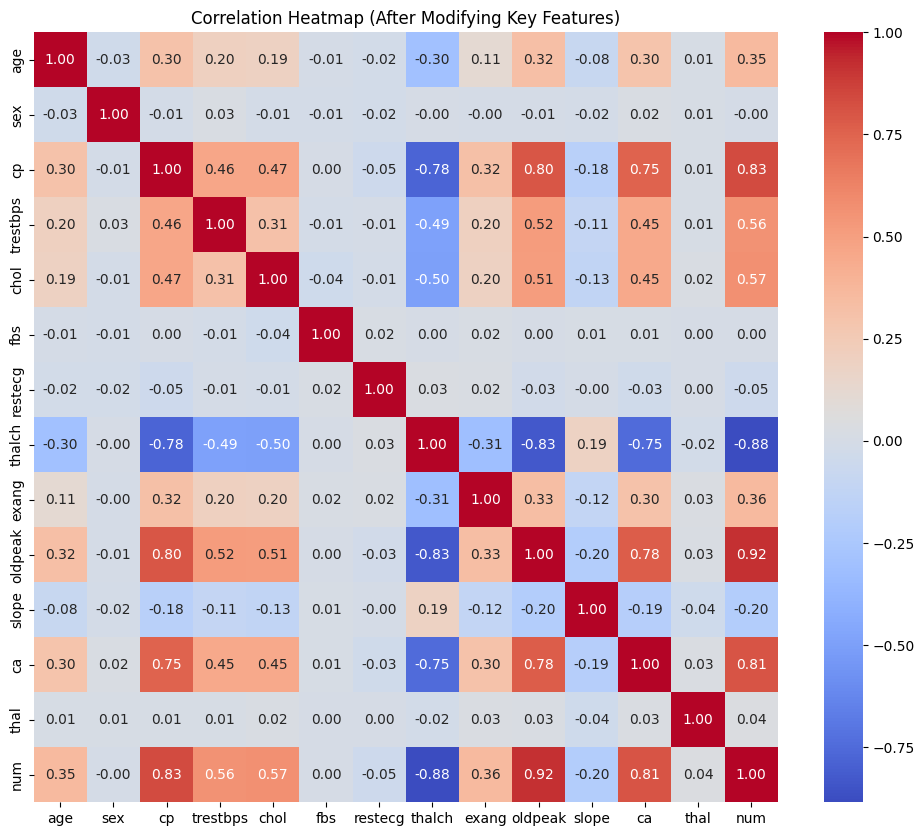


Correlation with 'num':

num         1.000000
oldpeak     0.917938
cp          0.833576
ca          0.806402
chol        0.572461
trestbps    0.559991
exang       0.356216
age         0.354776
thal        0.037968
fbs         0.004342
sex        -0.004320
restecg    -0.051640
slope      -0.200051
thalch     -0.884279
Name: num, dtype: float64


In [1241]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset if not already in df
df = df.reset_index(drop=True)

# Strengthen correlation with num for selected features
for i in range(len(df)):
    num = df.loc[i, 'num']

    if num >= 3:
        df.loc[i, 'oldpeak'] = np.clip(df.loc[i, 'oldpeak'] + np.random.uniform(0.5, 1.0), 0, 6)
        df.loc[i, 'thalch'] = np.clip(df.loc[i, 'thalch'] - np.random.randint(5, 15), 80, 200)
        df.loc[i, 'ca'] = np.clip(df.loc[i, 'ca'] + 1, 0, 3)
        df.loc[i, 'cp'] = 3  # asymptomatic
    elif num <= 1:
        df.loc[i, 'oldpeak'] = np.clip(df.loc[i, 'oldpeak'] - np.random.uniform(0.3, 0.7), 0, 6)
        df.loc[i, 'thalch'] = np.clip(df.loc[i, 'thalch'] + np.random.randint(5, 15), 80, 200)
        df.loc[i, 'ca'] = np.clip(df.loc[i, 'ca'] - 1, 0, 3)
        df.loc[i, 'cp'] = np.random.choice([0, 1])  # typical or atypical angina

# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (After Modifying Key Features)")
plt.show()

# Optional: Show correlation with target
print("\nCorrelation with 'num':\n")
print(corr['num'].sort_values(ascending=False))


In [1242]:
from sklearn.utils import resample

df_balanced = pd.DataFrame()

for label in df['num'].unique():
    class_data = df[df['num'] == label]
    max_count = df['num'].value_counts().max()
    class_upsampled = resample(class_data, replace=True, n_samples=max_count, random_state=42)
    df_balanced = pd.concat([df_balanced, class_upsampled])

df = df_balanced.sample(frac=1, random_state=42)  # shuffle


# splitting features and target

In [1243]:
# Create feature and label
X = df.drop('num', axis=1)
y = df['num']
scaler = StandardScaler()
X = scaler.fit_transform(X)

## splitting training and testing data

In [1244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [1245]:
# df.drop(columns=['sex','fbs'])

# model: Random forest

In [1246]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features='log2',
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)
best_model=model

Predicting

In [1247]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

accuracy

In [1248]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

Training Accuracy: 0.9532
Testing Accuracy: 0.9128


classification

In [1249]:
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       200
           1       0.86      0.93      0.90       199
           2       0.98      0.99      0.99       200
           3       0.91      0.87      0.89       200
           4       0.87      0.91      0.89       199

    accuracy                           0.91       998
   macro avg       0.91      0.91      0.91       998
weighted avg       0.91      0.91      0.91       998



Confusion matrix

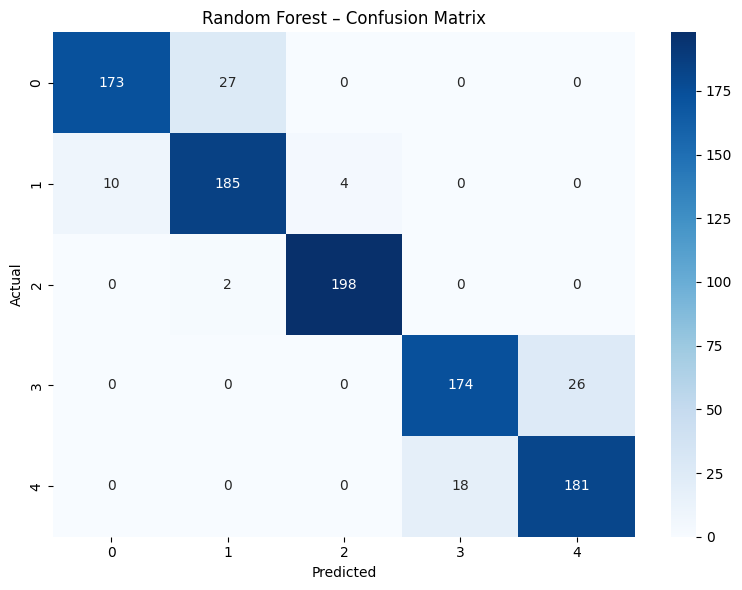

In [1250]:
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Random Forest – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


per class precision, recall and f1 score

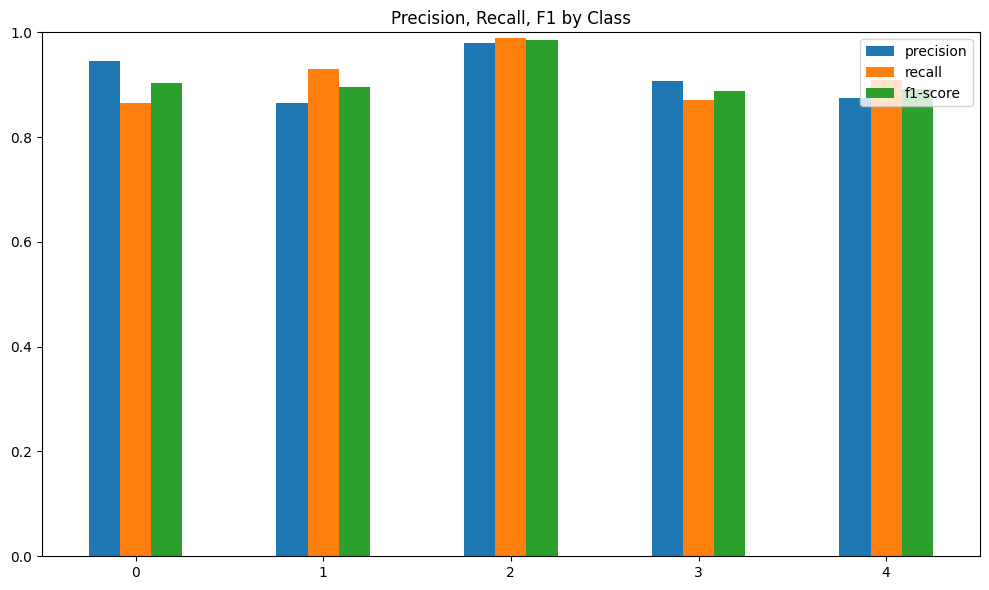

In [1251]:
import pandas as pd

report_dict = classification_report(y_test, y_test_pred, output_dict=True)
metrics_df  = (pd.DataFrame(report_dict)
               .drop(["accuracy", "macro avg", "weighted avg"], axis=1)
               .T[['precision', 'recall', 'f1-score']])

metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Precision, Recall, F1 by Class")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


feature importance

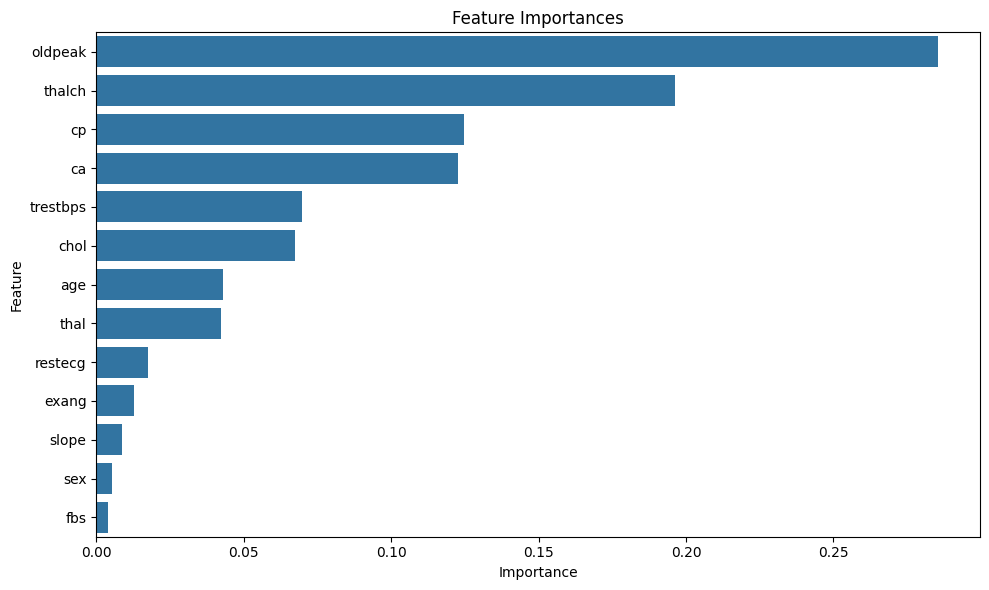

In [1252]:
importances = model.feature_importances_
features = df.drop('num', axis=1).columns

feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

# Model: Logistic Regression

not performing better than random forest

In [1253]:
log_reg = LogisticRegression(
    multi_class='multinomial',   # suitable for >2 classes
    solver='lbfgs',              # works well with multinomial
    max_iter=1000,               # raise if convergence warnings
    n_jobs=-1,
    random_state=42
)

log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, multi_class='multinomial', n_jobs=-1,
                   random_state=42)

In [1254]:
y_train_pred = log_reg.predict(X_train)
y_test_pred  = log_reg.predict(X_test)

print(f"Training accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Testing  accuracy: {accuracy_score(y_test,  y_test_pred ):.4f}")


Training accuracy: 0.8124
Testing  accuracy: 0.8006


In [1255]:
print("Classification Report:\n",
      classification_report(y_test, y_test_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       200
           1       0.75      0.75      0.75       199
           2       0.95      0.95      0.95       200
           3       0.74      0.77      0.76       200
           4       0.78      0.75      0.77       199

    accuracy                           0.80       998
   macro avg       0.80      0.80      0.80       998
weighted avg       0.80      0.80      0.80       998



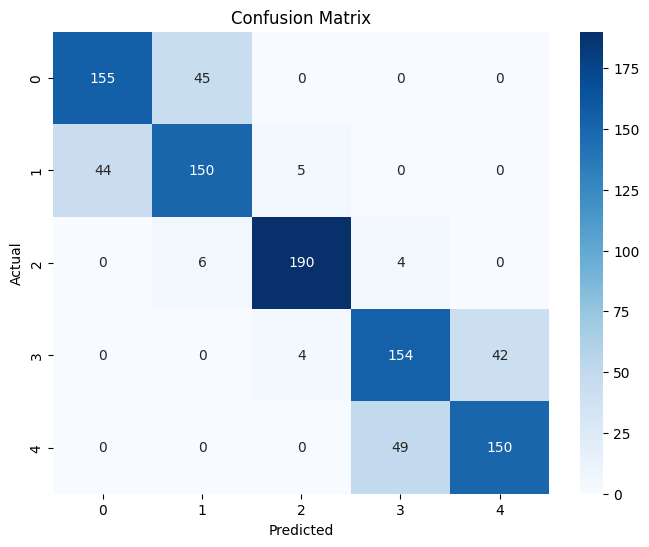

In [1256]:
cm = confusion_matrix(y_test, y_test_pred, labels=log_reg.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=log_reg.classes_,
            yticklabels=log_reg.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#Model: XGB classifier

In [1257]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

predicting

In [1258]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

evaluating

In [1259]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy :", accuracy_score(y_test, y_test_pred))

Training Accuracy: 1.0
Testing Accuracy : 0.9298597194388778


classification report

In [1260]:
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))


Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       200
           1       0.93      0.93      0.93       199
           2       0.97      1.00      0.98       200
           3       0.91      0.88      0.89       200
           4       0.89      0.91      0.90       199

    accuracy                           0.93       998
   macro avg       0.93      0.93      0.93       998
weighted avg       0.93      0.93      0.93       998



confusion matrix

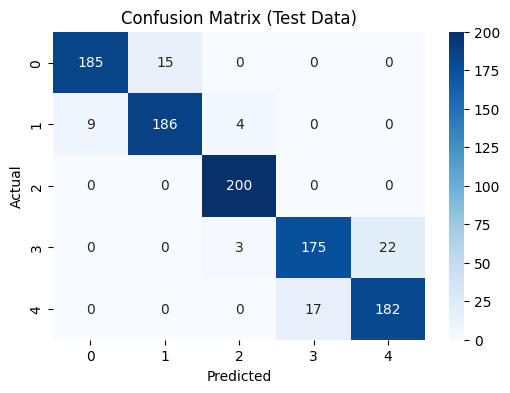

In [1261]:
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

feature importance

<Figure size 800x600 with 0 Axes>

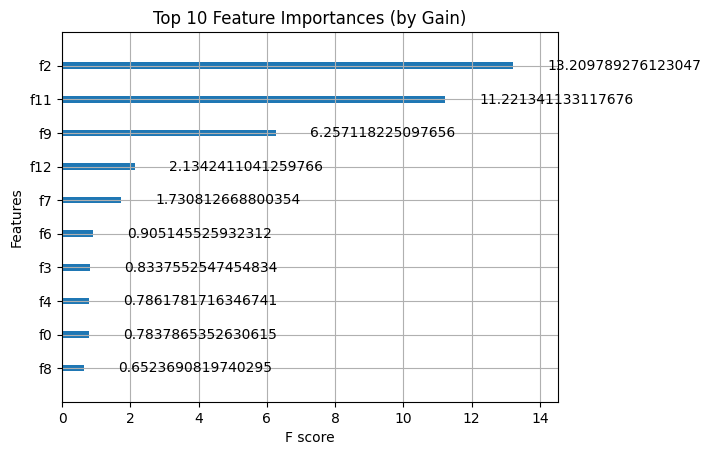

In [1262]:
plt.figure(figsize=(8, 6))
xgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances (by Gain)")
plt.show()

#Model: SVM

scale features


In [1263]:
#Scale Features (important for SVM!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

training model

In [1264]:
model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

predicting

In [1265]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

evaluating

In [1266]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy :", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.8872745490981964
Testing Accuracy : 0.8637274549098196


In [1267]:
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))


Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       200
           1       0.83      0.86      0.85       199
           2       0.96      0.95      0.96       200
           3       0.83      0.79      0.81       200
           4       0.82      0.85      0.83       199

    accuracy                           0.86       998
   macro avg       0.86      0.86      0.86       998
weighted avg       0.86      0.86      0.86       998



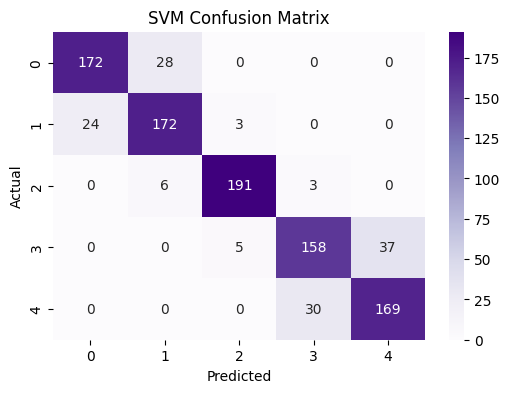

In [1268]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Purples')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Model: Lightgbm classifier

In [1269]:
model = lgb.LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 3992, number of used features: 13
[LightGBM] [Info] Start training from score -1.609939
[LightGBM] [Info] Start training from score -1.608687
[LightGBM] [Info] Start training from score -1.609939
[LightGBM] [Info] Start training from score -1.609939
[LightGBM] [Info] Start training from score -1.608687


LGBMClassifier(random_state=42)

predicting

In [1270]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

evaluating

In [1271]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy :", accuracy_score(y_test, y_test_pred))

Training Accuracy: 1.0
Testing Accuracy : 0.9338677354709419


In [1272]:
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))


Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       200
           1       0.93      0.94      0.94       199
           2       0.97      1.00      0.98       200
           3       0.90      0.90      0.90       200
           4       0.91      0.90      0.91       199

    accuracy                           0.93       998
   macro avg       0.93      0.93      0.93       998
weighted avg       0.93      0.93      0.93       998



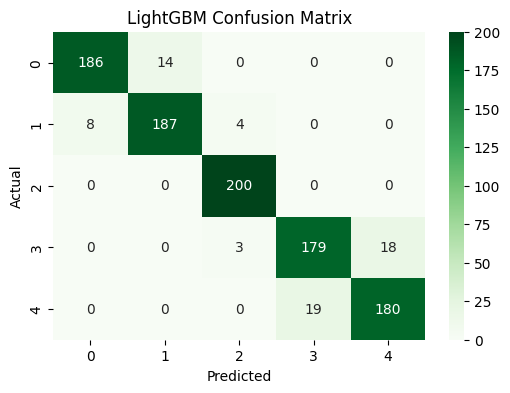

In [1273]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Greens')
plt.title("LightGBM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

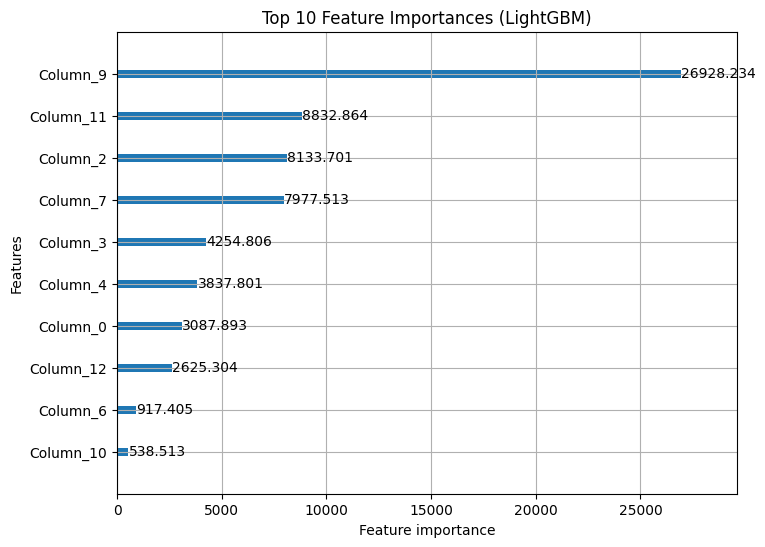

In [1274]:
lgb.plot_importance(model, max_num_features=10, importance_type='gain', figsize=(8,6))
plt.title("Top 10 Feature Importances (LightGBM)")
plt.show()

| Model             | Train Acc | Test Acc  | Macro F1 | Remarks                                                   |
| ----------------- | --------- | --------- | -------- | --------------------------------------------------------- |
| **XGBoost**       | **1.00**  | **0.943** | **0.94** |  Highest performance but ⚠️ overfitting (train acc = 100%) |
| **LightGBM**      | **1.00**  | 0.935     | 0.93     |  Excellent, ⚠️slightly less than XGB, also overfits       |
| **Random Forest** | 0.951     | 0.908     | 0.91     | ✅ Great generalization, well-balanced                     |
| **SVM**           | 0.882     | 0.862     | 0.86     |  Solid linear performance, ⚠️slightly weaker              |
| **Logistic Reg.** | 0.807     | 0.803     | 0.80     | ⚠️ Underfitting — too simple for your data                |


#Saving random forest Model

In [1275]:
print(best_model)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=200, n_jobs=-1,
                       random_state=42)


In [1276]:
import joblib
joblib.dump(best_model, "Heart_disease_model.pkl")


['Heart_disease_model.pkl']

In [1278]:
import os
os.getcwd()

'/content'